In [7]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
from IPython.display import Image, HTML

import laUtilities as ut

%matplotlib inline

# Intoduction to Networks

Now we will encounter a new kind of data: __networks__, also called __graphs.__

(We're going to use the two terms interchangeably).

## Basic Definitions

A graph is a pair $(V, E)$ where $V$ is a set of __vertices__ and $E$ is a set of vertex pairs called __edges.__

We'll also use the term __nodes__ for vertices,

and we'll use the term __links__ for edges.

We'll distinguish between __undirected__ graphs and __directed__ graphs.

In an underdirected graph, an edge $(u, v)$ is an unordered pair.  The edge $(v, u)$ is the same thing.

In a directed graph, $(u, v)$ is an ordered pair, and it is different from $(v, u)$.

((Visual examples of directed and undirected using networkx.))

A __path__ in a graph from $u$ to $v$ is a sequence of edges that starts at $u$ and ends at $v$.

In a directed graph, all of the edges in a path need to be oriented head-to-tail.

If there is a path from $u$ to $v$, we say that $v$ is __reachable__ from $u$.

((examples))

### Degree

The __degree__ of a node is the number of edges it has.

In a directed graph, we distinguish between:
* __in-degree__: the number of incoming edges to the node
* __out-degree__: the number of outgoing edges to the node

The __neighbors__ of a node are the nodes to which it is connected.

So the degree of a node is the number of neighbors it has.

Node that in a network with $n$ nodes and $e$ edges, the average node degree is $2e/n$.  

Make sure that this is obvious to you!

### Connectivity

The first question to ask about a graph is: is it __connected__?

In a connected graph, for each pair of nodes $(u, v)$, either $u$ is reachable from $v$, or vice-versa.

((examples))

If the graph is not connected, it may contain __connected components__.   

A connected component is a subgraph that is connected.

In a directed graph, we can also ask if it is __strongly connected.__

A graph is strongly connected if there is a (directed) path between any two nodes.

That is, any node is reachable from any other node.

Within a directed graph, only a subset of nodes may be strongly connected.

These are called the __strongly connected component__ (SCC).

## Characterizing Graphs

When you first start working with a network, there are some basic questions that are very helpful to ask.

It is helpful to characterize the degrees, components, and other structures in the graph.

### Degree Distributions

Understanding connectivity starts with asking about observed degrees in the graph.

This is captured in the __degree distribution.__

$$ P[D > x] = \text{probability that a node has degree at least } x $$

We typically focus out attention on large values of $x$ -- nodes that are highly connected.

#### Power Law Degree Distributions are Common.

It's common for a degree distribution to __approximately__ follow a power-law.

The simplest power-law distribution is called the Pareto distribution:

$$ P[D > x] = k^{\alpha} x^{-\alpha}\;\;\; k \leq x,\; \;0 < \alpha
\leq 2. $$

It takes on values in the range $[k, \infty]$. 

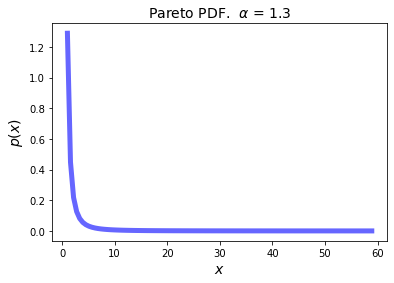

In [11]:
from scipy.stats import pareto
alpha = 1.3
x = np.linspace(pareto.ppf(0.005,alpha), pareto.ppf(0.995,alpha), 100)
plt.plot(x, pareto.pdf(x,alpha),'b-', lw = 5, alpha = 0.6, label='pareto pdf')
plt.title(r'Pareto PDF.  $\alpha$ = {}'.format(alpha), size=14)
plt.xlabel('$x$', size=14)
plt.ylabel('$p(x)$', size=14);

We've seen distributions like this before when looking at recommender system data.

In a distribution like this, almost all values are very small, 

but there is a non-negligible fraction of values that are __very__ large.

This is like "grains of sand" mixed with a few "boulders."

This is also referred to as "elephants and mice."

What does this mean for node degree?

It means that 
* most nodes have __few neighbors,__ but
* an important small subset of nodes have __many, many neighbors.__

To capture such high-variable degree distributions, a common strategy is to plot them on __log-log__ axes.

On log-log axes, a Pareto distribution appears as a straight line:

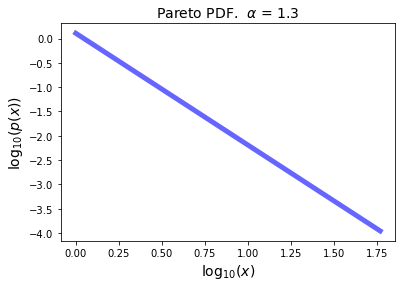

In [12]:
from scipy.stats import pareto
alpha = 1.3
x = np.linspace(pareto.ppf(0.005,alpha), pareto.ppf(0.995,alpha), 100)
plt.plot(np.log10(x), np.log10(pareto.pdf(x,alpha)),'b-', lw = 5, alpha = 0.6, label='pareto pdf')
plt.title(r'Pareto PDF.  $\alpha$ = {}'.format(alpha), size=14)
plt.xlabel('$\log_{10}(x)$', size=14)
plt.ylabel('$\log_{10}(p(x))$', size=14);

#### Power Law Degree Distributions are Ubiquitous.

<center>
    
<img src="figs/L21-power-law-degree-newman.png" alt="Figure" width="800px">
    
</center>

From Newman, 2003

### Clustering

The next important property of a network to understand is __clustering__.  

In the context of networks, clustering refers to the tendency for groups of nodes to have higher connectivity within the group than the network-wide average.